In [1]:
!pip install sklearn
!pip install -U gensim

     |████████████████████████████████| 24.2MB 136kB/s 
  Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [2]:
import os
import numpy as np

import gensim
from gensim.models import Word2Vec

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/My Drive/Kaggle"

In [5]:
#changing the working directory
%cd /content/drive/My Drive/Kaggle

#Check the present working directory using pwd command

/content/drive/My Drive/Kaggle


In [6]:
!kaggle datasets download -d rtatman/glove-global-vectors-for-word-representation

 99% 454M/458M [00:04<00:00, 107MB/s]
100% 458M/458M [00:04<00:00, 104MB/s]


In [7]:
#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

Archive:  glove-global-vectors-for-word-representation.zip
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.50d.txt        


In [8]:
!kaggle datasets download -d sandreds/googlenewsvectorsnegative300

100% 1.64G/1.64G [00:24<00:00, 49.8MB/s]
100% 1.64G/1.64G [00:24<00:00, 73.0MB/s]


In [9]:
#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

Archive:  googlenewsvectorsnegative300.zip
  inflating: GoogleNews-vectors-negative300.bin  


In [12]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""

"""

##### >>>>>>>>  pip install -U gensim ####
#######################################
import os
import gensim

from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec
glove_input_file = 'glove.6B.50d.txt'
word2vec_output_file = 'glove.6B.50d.txt.word2vec'
glove2word2vec(glove_input_file, word2vec_output_file)

#######################################


######################################
# load the Stanford GloVe model
filename = 'glove.6B.50d.txt.word2vec'
model = KeyedVectors.load_word2vec_format(filename, binary=False)

print(model['man'])
print(model['glad'])
print(model['happy'])
print (model.wv.similarity('glad', 'happy'))
print (model.wv.similarity('king', 'woman'))
print (model.wv.similarity('man', 'report'))

# calculate: (king - man) + woman = ?
result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result)
model.wv.most_similar("man")


[-0.094386  0.43007  -0.17224  -0.45529   1.6447    0.40335  -0.37263
  0.25071  -0.10588   0.10778  -0.10848   0.15181  -0.65396   0.55054
  0.59591  -0.46278   0.11847   0.64448  -0.70948   0.23947  -0.82905
  1.272     0.033021  0.2935    0.3911   -2.8094   -0.70745   0.4106
  0.3894   -0.2913    2.6124   -0.34576  -0.16832   0.25154   0.31216
  0.31639   0.12539  -0.012646  0.22297  -0.56585  -0.086264  0.62549
 -0.0576    0.29375   0.66005  -0.53115  -0.48233  -0.97925   0.53135
 -0.11725 ]
[-0.049712  -0.26653   -0.20426   -0.36605    0.74033   -0.9297
 -0.39716    0.93877   -0.35901    0.060641  -0.15705    0.40281
 -0.68232   -0.2177     0.91216    0.42521    0.43335    0.30793
  0.59221   -0.39727   -0.51952    0.79381    0.52592    0.058425
  1.3621    -1.2471    -0.6159     0.48158    0.68242   -1.1488
  1.2637     0.91603   -0.33208    0.26206   -0.30648   -0.51035
  0.39492    0.66588    0.10188   -0.39422   -0.34186   -0.47241
 -0.13016    0.11317   -0.0037597  0.11631   

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).


[('woman', 0.8860337734222412),
 ('boy', 0.8564431071281433),
 ('another', 0.8452839851379395),
 ('old', 0.8372182846069336),
 ('one', 0.8276063203811646),
 ('who', 0.8244696259498596),
 ('him', 0.8194693922996521),
 ('turned', 0.8154467940330505),
 ('whose', 0.8119741678237915),
 ('himself', 0.807725727558136)]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


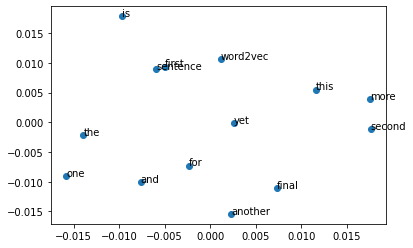

In [13]:

##################################
# Visualize Word Embedding

from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot
# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
			['this', 'is', 'the', 'second', 'sentence'],
			['yet', 'another', 'sentence'],
			['one', 'more', 'sentence'],
			['and', 'the', 'final', 'sentence']]
# train model
model = Word2Vec(sentences, min_count=1)
# fit a 2d PCA model to the vectors
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()